In [1]:
import re
def strip_all_but_numbers(stub):
    return int(re.sub('\D', '', stub))

# Read all CP2K output files for energy

In [2]:
import os

# directory = "./output"
directory = "./output_training_correct_cell"

print(type(directory))
target_string="ENERGY| Total FORCE_EVAL ( QS ) energy (a.u.):"
mapping={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+"/"+file)
    if filename.endswith(".out"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    mapping[strip_all_but_numbers(filename)]=float(line.replace(target_string,''))
                    break
        continue
    else:
        continue

<class 'str'>


In [3]:
mapping

{1: -1075.518292440226,
 100: -1072.3963206787403,
 1000: -1070.9238858117794,
 1004: -1075.7117063525143,
 1008: -1076.1360074822928,
 101: -1073.740337963556,
 1012: -1075.9605998633695,
 1016: -1075.8647598127056,
 1020: -1075.9040969848716,
 1024: -1075.8104470321475,
 1028: -1076.0744043693417,
 1032: -1075.4549586406863,
 1036: -1075.7442417996326,
 104: -1070.1301074804414,
 1040: -1076.0060980366852,
 1044: -1075.8099576464617,
 1048: -1074.0860646865685,
 105: -1070.4282399290207,
 1052: -1075.7821902582486,
 1056: -1076.2110422614182,
 1060: -1074.2563964949045,
 1068: -1075.7144540958789,
 1072: -1075.8915699212905,
 1076: -1075.9163973593716,
 108: -1075.99844860245,
 1080: -1076.2163686032297,
 1084: -1075.6621478370225,
 1088: -1075.4950741330154,
 109: -1068.567069329953,
 1092: -1075.9514748777433,
 1096: -1074.4472569824845,
 1100: -1076.086196715209,
 1104: -1073.523331044004,
 1108: -1076.0827084531845,
 1112: -1075.9099063571443,
 1116: -1075.7391209111029,
 112: -1

In [4]:
temp=list(mapping.keys())
temp.sort()
temp

[1,
 4,
 5,
 8,
 9,
 12,
 13,
 16,
 17,
 20,
 21,
 24,
 25,
 28,
 29,
 32,
 33,
 36,
 37,
 40,
 41,
 44,
 45,
 48,
 49,
 52,
 53,
 56,
 57,
 60,
 61,
 64,
 65,
 68,
 69,
 72,
 73,
 76,
 77,
 80,
 81,
 84,
 85,
 88,
 89,
 92,
 93,
 96,
 97,
 100,
 101,
 104,
 105,
 108,
 109,
 112,
 113,
 116,
 117,
 120,
 121,
 124,
 125,
 128,
 129,
 132,
 133,
 136,
 137,
 140,
 141,
 144,
 145,
 148,
 149,
 152,
 153,
 156,
 157,
 160,
 161,
 164,
 165,
 168,
 169,
 172,
 173,
 176,
 177,
 180,
 181,
 184,
 185,
 188,
 189,
 192,
 193,
 196,
 197,
 200,
 201,
 204,
 205,
 208,
 209,
 212,
 213,
 216,
 217,
 220,
 221,
 224,
 225,
 228,
 229,
 232,
 233,
 236,
 237,
 240,
 241,
 244,
 245,
 248,
 249,
 252,
 253,
 256,
 257,
 260,
 261,
 264,
 265,
 268,
 269,
 272,
 273,
 276,
 277,
 280,
 281,
 284,
 285,
 288,
 289,
 292,
 293,
 296,
 297,
 300,
 301,
 304,
 305,
 308,
 309,
 312,
 313,
 316,
 317,
 320,
 321,
 324,
 325,
 328,
 329,
 332,
 333,
 336,
 337,
 340,
 341,
 344,
 345,
 348,
 349,
 352

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

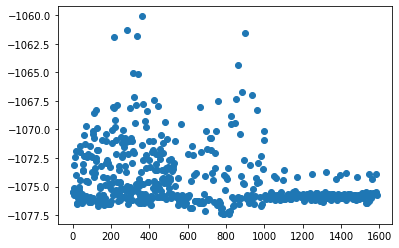

In [5]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*mapping.items()))
plt

In [6]:
import collections
od = collections.OrderedDict(sorted(mapping.items()))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

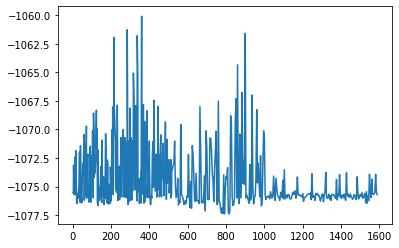

In [7]:
plt.plot(*zip(*od.items()))
plt

In [8]:
directory = "../data/coordinates_training/"
print(type(directory))
target_string="TotEnergy="
precalcEnergy={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+file)
    if filename.endswith(".xyz"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    splits=line.split(' ')
                    print(splits)
                    #energy=splits[0]
                    energy=splits[10]
                    #precalcEnergy[strip_all_but_numbers(filename)]=0.0367493*float(energy.replace(target_string,''))
                    precalcEnergy[strip_all_but_numbers(filename)]=float(energy.replace(target_string,''))
                    
                    #print(precalcEnergy[strip_all_but_numbers(filename)])
                    break
        continue
    else:
        continue

<class 'str'>
['Lattice="23.46511', '0.0', '0.0', '0.0', '23.46511', '0.0', '0.0', '0.0', '23.46511"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.24236', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.46511', '0.0', '0.0', '0.0', '23.46511', '0.0', '0.0', '0.0', '23.46511"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.24577', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.46511', '0.0', '0.0', '0.0', '23.46511', '0.0', '0.0', '0.0', '23.46511"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.22595', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.46511', '0.0', '0.0', '0.0', '23.46511', '0.0', '0.0', '0.0', '23.46511"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.27113', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.46511', '0.0', '0.0', '0.0', '23.46511', '0.0', '0.0', '0.0', '23.46511"', 'Properties=species:S:1:pos:R:3:force:R:3', '

['Lattice="23.41937', '0.0', '0.0', '0.0', '23.41937', '0.0', '0.0', '0.0', '23.41937"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.44551', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.33018', '0.0', '0.0', '0.0', '23.33018', '0.0', '0.0', '0.0', '23.33018"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.84721', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.33018', '0.0', '0.0', '0.0', '23.33018', '0.0', '0.0', '0.0', '23.33018"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.8818', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.1773', '0.0', '0.0', '0.0', '23.1773', '0.0', '0.0', '0.0', '23.1773"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.81086', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.40199', '0.0', '0.0', '0.0', '23.40199', '0.0', '0.0', '0.0', '23.40199"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.67

['Lattice="25.24593', '0.0', '0.0', '0.0', '25.24593', '0.0', '0.0', '0.0', '25.24593"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.50166', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="25.09116', '0.0', '0.0', '0.0', '25.09116', '0.0', '0.0', '0.0', '25.09116"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.87631', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="25.34137', '0.0', '0.0', '0.0', '25.34137', '0.0', '0.0', '0.0', '25.34137"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.26742', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.93361', '0.0', '0.0', '0.0', '24.93361', '0.0', '0.0', '0.0', '24.93361"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.17621', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.77031', '0.0', '0.0', '0.0', '24.77031', '0.0', '0.0', '0.0', '24.77031"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-110

['Lattice="24.56323', '0.0', '0.0', '0.0', '24.56323', '0.0', '0.0', '0.0', '24.56323"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.03185', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.5859', '0.0', '0.0', '0.0', '24.5859', '0.0', '0.0', '0.0', '24.5859"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.89887', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.78088', '0.0', '0.0', '0.0', '23.78088', '0.0', '0.0', '0.0', '23.78088"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.03857', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.73236', '0.0', '0.0', '0.0', '24.73236', '0.0', '0.0', '0.0', '24.73236"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.96632', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.73236', '0.0', '0.0', '0.0', '24.73236', '0.0', '0.0', '0.0', '24.73236"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.9

['Lattice="25.06397', '0.0', '0.0', '0.0', '25.06397', '0.0', '0.0', '0.0', '25.06397"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.10535', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.84789', '0.0', '0.0', '0.0', '24.84789', '0.0', '0.0', '0.0', '24.84789"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.01012', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="25.21993', '0.0', '0.0', '0.0', '25.21993', '0.0', '0.0', '0.0', '25.21993"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.19881', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="25.69634', '0.0', '0.0', '0.0', '25.69634', '0.0', '0.0', '0.0', '25.69634"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.30413', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="25.3126', '0.0', '0.0', '0.0', '25.3126', '0.0', '0.0', '0.0', '25.3126"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.2

['Lattice="22.75718', '0.0', '0.0', '0.0', '22.75718', '0.0', '0.0', '0.0', '22.75718"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.19438', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="22.86705', '0.0', '0.0', '0.0', '22.86705', '0.0', '0.0', '0.0', '22.86705"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.23743', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.05016', '0.0', '0.0', '0.0', '23.05016', '0.0', '0.0', '0.0', '23.05016"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.12738', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="22.52344', '0.0', '0.0', '0.0', '22.52344', '0.0', '0.0', '0.0', '22.52344"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1102.2054', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="23.09899', '0.0', '0.0', '0.0', '23.09899', '0.0', '0.0', '0.0', '23.09899"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103

['Lattice="30.2866', '0.0', '0.0', '0.0', '28.4698', '0.0', '0.0', '0.0', '17.49272"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.44235', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.04344', '0.0', '0.0', '0.0', '24.04344', '0.0', '0.0', '0.0', '24.04344"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.3177', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.34312', '0.0', '0.0', '0.0', '24.34312', '0.0', '0.0', '0.0', '24.34312"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.39123', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.29476', '0.0', '0.0', '0.0', '24.29476', '0.0', '0.0', '0.0', '24.29476"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.42731', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.38539', '0.0', '0.0', '0.0', '24.38539', '0.0', '0.0', '0.0', '24.38539"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.3

['Lattice="24.34312', '0.0', '0.0', '0.0', '24.34312', '0.0', '0.0', '0.0', '24.34312"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.24694', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.29476', '0.0', '0.0', '0.0', '24.29476', '0.0', '0.0', '0.0', '24.29476"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.46875', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.38539', '0.0', '0.0', '0.0', '24.38539', '0.0', '0.0', '0.0', '24.38539"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.48853', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.4342', '0.0', '0.0', '0.0', '24.4342', '0.0', '0.0', '0.0', '24.4342"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.43487', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.05554', '0.0', '0.0', '0.0', '24.05554', '0.0', '0.0', '0.0', '24.05554"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.3

['Lattice="24.41789', '0.0', '0.0', '0.0', '24.41789', '0.0', '0.0', '0.0', '24.41789"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.55796', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.83406', '0.0', '0.0', '0.0', '24.83406', '0.0', '0.0', '0.0', '24.83406"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.47352', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.2367', '0.0', '0.0', '0.0', '24.2367', '0.0', '0.0', '0.0', '24.2367"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.38423', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.57215', '0.0', '0.0', '0.0', '24.57215', '0.0', '0.0', '0.0', '24.57215"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.50016', 'cutoff=-1.0', 'nneightol=1.2', 'pbc="T', 'T', 'T"\n']
['Lattice="24.45756', '0.0', '0.0', '0.0', '24.45756', '0.0', '0.0', '0.0', '24.45756"', 'Properties=species:S:1:pos:R:3:force:R:3', 'TotEnergy=-1103.4

In [9]:
precalcEnergy

{0: -1103.24236,
 1: -1103.24577,
 2: -1103.22595,
 3: -1103.27113,
 4: -1103.00342,
 5: -1103.13678,
 6: -1103.1855,
 7: -1103.27873,
 8: -1103.02026,
 9: -1102.36927,
 10: -1103.68636,
 11: -1102.5903,
 12: -1103.78884,
 13: -1102.45325,
 14: -1102.87587,
 15: -1102.74104,
 16: -1102.78301,
 17: -1103.76502,
 18: -1102.5589,
 19: -1103.0478,
 20: -1103.98334,
 21: -1103.69368,
 22: -1103.67029,
 23: -1103.84993,
 24: -1102.88531,
 25: -1102.79902,
 26: -1102.43163,
 27: -1102.82073,
 28: -1103.7089,
 29: -1103.56742,
 30: -1102.68935,
 31: -1102.97603,
 32: -1103.71529,
 33: -1102.72819,
 34: -1103.67044,
 35: -1102.5454,
 36: -1102.80757,
 37: -1103.52881,
 38: -1103.00166,
 39: -1103.85736,
 40: -1102.7611,
 41: -1103.71366,
 42: -1103.53393,
 43: -1103.78063,
 44: -1103.51121,
 45: -1102.6174,
 46: -1103.82603,
 47: -1103.7355,
 48: -1103.75605,
 49: -1102.77177,
 50: -1103.74662,
 51: -1102.75281,
 52: -1103.67151,
 53: -1102.36224,
 54: -1103.51632,
 55: -1102.80823,
 56: -1102.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

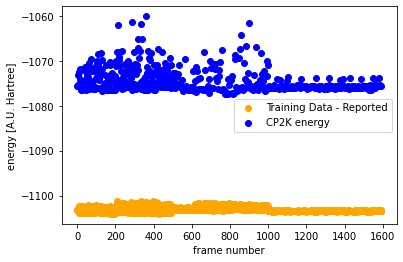

In [16]:
plt.scatter(*zip(*precalcEnergy.items()),color="orange",label="Training Data - Reported")
plt.scatter(*zip(*mapping.items()),color="blue",label="CP2K energy")
plt.legend()
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt

In [11]:
differences={}
for i in mapping:
    i=int(i)
    try:
        differences[i]=mapping[i]-precalcEnergy[i]
    except:
        print("%i doesnt exist")
    

In [12]:
differences

{1: 27.727477559773888,
 100: 30.22951932125966,
 1000: 32.518464188220605,
 1004: 27.752243647485784,
 1008: 27.25752251770723,
 101: 28.918022036443972,
 1012: 27.4624701366306,
 1016: 27.585890187294353,
 1020: 27.497833015128435,
 1024: 27.651932967852417,
 1028: 27.22144563065831,
 1032: 27.86030135931378,
 1036: 27.722348200367378,
 104: 32.59926251955858,
 1040: 27.473701963314852,
 1044: 27.473362353538278,
 1048: 29.280725313431503,
 105: 33.26385007097929,
 1052: 27.6531297417514,
 1056: 27.21626773858179,
 1060: 29.144663505095423,
 1068: 27.741425904121115,
 1072: 27.58662007870953,
 1076: 27.36032264062851,
 108: 26.433221397549914,
 1080: 27.250841396770284,
 1084: 27.72845216297742,
 1088: 28.058475866984736,
 109: 34.963470670046945,
 1092: 27.500775122256755,
 1096: 28.905253017515406,
 1100: 27.301863284790898,
 1104: 29.855188955996027,
 1108: 27.27551154681555,
 1112: 27.664903642855734,
 1116: 27.674339088897113,
 112: 32.91779997585263,
 1120: 27.449234851514802,


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

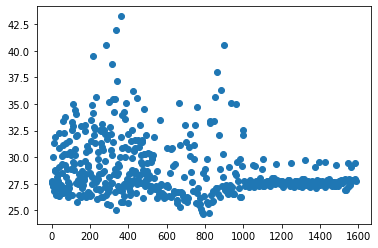

In [13]:
plt.scatter(*zip(*differences.items()))
plt

Text(0, 0.5, 'cp2k calculated energy (hartree)')

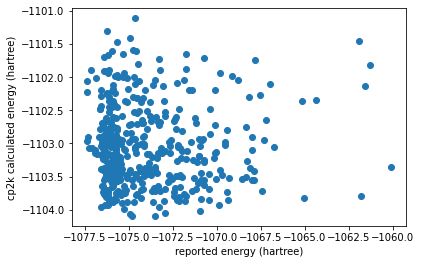

In [29]:
x=[]
y=[]
for i in mapping:
    i=int(i)
    try:
        x.append(mapping[i])
        y.append(precalcEnergy[i])
    except:
        pass
plt.scatter(x,y)
plt.xlabel("reported energy (hartree)")
plt.ylabel("cp2k calculated energy (hartree)")

# Read slurm file for run energy

In [14]:
filename="../data/slurm/unbiased5_slurm.out"
target_string="### NNP EW SUMMARY ###"
target_number=493
energy_list=[]
with open(filename,'r') as f:
    lines=f.readlines()
    energy_list.append(lines[target_number-1].split())
    for ind in range(target_number,len(lines)):
        if(target_string in lines[ind]):
            pass
        elif("Loop time" in lines[ind]):
            break
        else:
            energy_list.append(lines[ind].split())

In [15]:
import pandas as pd
header=energy_list.pop(0)
df = pd.DataFrame(energy_list, columns=header)
df['Step'] = df['Step'].astype(int)
df['TotEng'] = 0.0367493*df['TotEng'].astype(float)
df

KeyError: 'Step'

In [ ]:
df['TotEng'][0]

In [ ]:

plt.scatter(df['Step'][0::50],df['TotEng'][0::50])
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.show()

In [ ]:
factor={}
for i in mapping:
    i=int(i)
    try:
        factor[i]=df['TotEng'][50*(i-1)]/mapping[i]
    except:
        print("%i doesnt exist")

In [ ]:
plt.scatter(*zip(*factor.items()),color="orange")
plt.ylabel("N2P2 enery/CP2K calculation")
plt.xlabel("frame number")
plt.title("comparing n2p2 and cp2k energy")
plt

In [ ]:
df['Cp2k']=[0]*len(df)
df['Cp2k'] = df['Cp2k'].astype(float)
df

In [ ]:
print(mapping)

In [ ]:
for i in mapping:
    df.at[50*(i-1),'Cp2k']=mapping[i]
df

# Plot CP2K v/s N2P2 energy

In [ ]:
plt.scatter(df['Cp2k'][0::50],df['TotEng'][0::50],c=df['Step'][::50],picker=True)
plt.xlabel("CP2K energy")
plt.ylabel("N2P2 energy")

#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['figure.figsize'] = [14, 16]
clb=plt.colorbar()
clb.ax.set_title("frame number")
plt.title("N2P2(reported) energy v/s CP2K calculation",y=1.08)
#plt.colorbar.setlabel("timestep")
plt.show()

# Plot CP2K, N2p2 energy v/s frame

In [ ]:
plt.scatter(df['Step'][0::50],df['TotEng'][0::50],color="blue",label='n2p2')
plt.scatter(df['Step'][0::50],df['Cp2k'][0::50],color="orange",label='cp2k')
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.legend()
plt.title("Total energy from CP2K calculation and N2P2(reported in output)")
plt.show()

# Plot Cp2k, n2p2 relative energy v/s frame
Relative energy is energy - lowest energy recorded

In [ ]:
from statistics import median
n2p2Ener=[]
cp2kEner=[]
n2p2min=min(df['TotEng'][0::50])
cp2kmin=min(df['Cp2k'][0::50])
for i in df['TotEng'][0::50]:
    n2p2Ener.append(i-n2p2min)
    
for i in df['Cp2k'][0::50]:
    cp2kEner.append(i-cp2kmin)

In [ ]:
plt.scatter(df['Step'][0::50],n2p2Ener,color="blue",label='n2p2')
plt.scatter(df['Step'][0::50],cp2kEner,color="orange",label="cp2k")
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.title("cp2k and n2p2 relative energies(min)")
plt.legend()
plt.show()

In [ ]:
plt.scatter(cp2kEner,n2p2Ener,c=df['Step'][::50],picker=True)
plt.xlabel("CP2K energy")
plt.ylabel("N2P2 energy")

#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['figure.figsize'] = [14, 16]
plt.colorbar()
#plt.colorbar.setlabel("timestep")
plt.show()